In [181]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("record.csv")
df

,mask_percent,mlm_acc_each_epoch,mlm_loss_each_epoch
0,15,"[[0.3262000472925041, 0.40606526365571055, 0.4...","[[0.12045097351074219, 0.03537557274103165, 0...."
1,6,"[[0.3289824977751409, 0.4142687629783447, 0.44...","[[0.03919012099504471, 0.026482563465833664, 0..."
2,15,"[[0.33061271410506954, 0.40866766294976437, 0....","[[0.10397405922412872, 0.02277682162821293, 0...."
3,6,"[[0.375036116729269, 0.4360011557353366, 0.458...","[[0.04653055593371391, 0.030130138620734215, 0..."


In [182]:
mask_range = [i for i in range(15, 5, -1)]

In [183]:
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print((mlm_acc))

[[0.3284063806987868, 0.40736646330273746, 0.42857903245321016, 0.44118438895586565, 0.45571404450643793, 0.45173847930216293, 0.4883298481456122, 0.5032710127693295, 0.509862133706331, 0.5371962116469765], nan, nan, nan, nan, nan, nan, nan, nan, [0.3520093072522049, 0.42513495935684065, 0.4518329256174943, 0.46876289691867623, 0.4824209775391871, 0.49492717984549794, 0.5062140059454714, 0.513246772036519, 0.5453624191107403, 0.5630818800430033]]


c:\Users\Ai\anaconda3\envs\transformer_torch\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Ai\anaconda3\envs\transformer_torch\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [184]:
a = np.array(mlm_acc)
print(a.T)
a = np.sort(a.T)
print(a)

[list([0.3284063806987868, 0.40736646330273746, 0.42857903245321016, 0.44118438895586565, 0.45571404450643793, 0.45173847930216293, 0.4883298481456122, 0.5032710127693295, 0.509862133706331, 0.5371962116469765])
 nan nan nan nan nan nan nan nan
 list([0.3520093072522049, 0.42513495935684065, 0.4518329256174943, 0.46876289691867623, 0.4824209775391871, 0.49492717984549794, 0.5062140059454714, 0.513246772036519, 0.5453624191107403, 0.5630818800430033])]


C:\Users\Ai\AppData\Local\Temp\ipykernel_12032\4175723222.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(mlm_acc)


TypeError: '<' not supported between instances of 'float' and 'list'

In [ ]:
for i in a:
    print(i[7])

0.3362045610504866
0.42182255318410605
0.4442227028538623
0.46066876369463705
0.4795965866447374
0.49710783243149104
0.5088919555324115
0.5279138168999776
0.5426743626098881
0.556656507780569


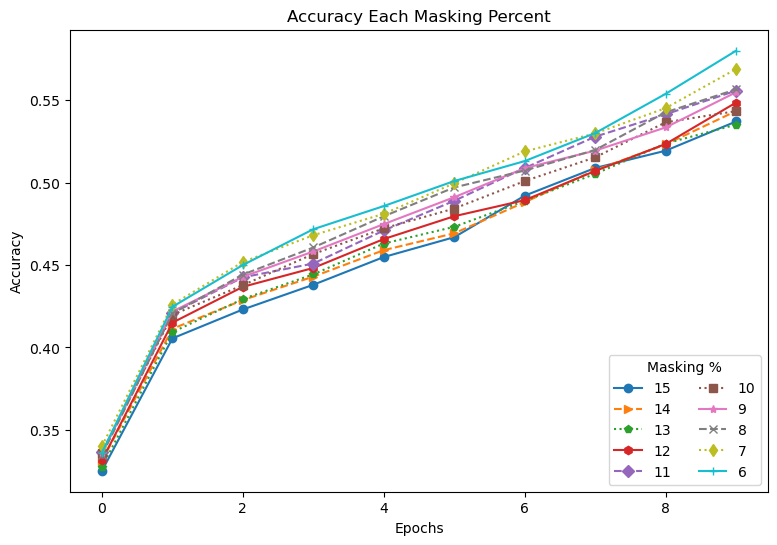

In [ ]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
for i in range(10):
    plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

In [ ]:
max_acc_each_epoch = np.max(np.array(mlm_acc), axis=0)
max_acc_each_epoch

array([0.34009329, 0.42603925, 0.45185073, 0.47175841, 0.48581114,
       0.5009914 , 0.51897245, 0.53010294, 0.55390329, 0.58008685])

In [ ]:
epochs = [i for i in range(10)]
mlm_loss = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][2][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_loss.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print(mlm_loss)

[[0.07943079769611358, 0.0467265922576189, 0.05762047506868839, 0.05535939037799835, 0.07000594511628151, 0.04798183143138886, 0.0469473322853446, 0.04609926138073206, 0.037388942390680316, 0.03583210576325655], [0.08445140384137631, 0.06642071828246117, 0.06002142243087292, 0.05118043217808008, 0.038250391557812694, 0.040658799558877946, 0.03589421696960926, 0.03534808177500963, 0.03775928597897291, 0.03815551865845919], [0.07391945794224739, 0.059580006077885626, 0.052399047464132306, 0.0519030686467886, 0.04992036893963814, 0.04674284365028143, 0.042494837753474714, 0.03530698181129992, 0.033599854446947575, 0.04164119865745306], [0.06758581399917603, 0.05038014240562916, 0.04827739354223013, 0.04280511736869812, 0.041996344923973083, 0.03575033936649561, 0.0349397674202919, 0.03487020693719387, 0.03794750701636076, 0.027186793461441993], [0.06601625457406043, 0.036837028339505196, 0.0391069995239377, 0.034129750169813636, 0.04133978821337223, 0.03234166903421283, 0.0313093952834606

<function matplotlib.pyplot.show(close=None, block=None)>

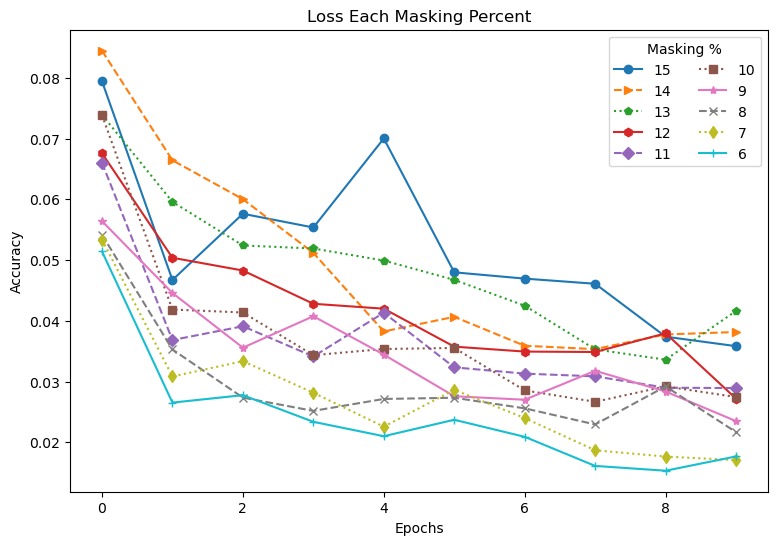

In [ ]:
plt.title("Loss Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
for i in range(10):
    plt.plot(epochs, mlm_loss[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, title = "Masking %", ncol = 2) 
plt.show

# Masking Position Methods Compare

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df_maskMove = pd.read_csv("record_mask_grow_move.csv")
df_maskMove = df_maskMove[:]
df_maskMove

,mlm_acc_each_epoch,mlm_loss_each_epoch,Mask_Percent_each_epoch
0,"[0.34239049740163324, 0.49110185535781903, 0.4...","[0.06312139332294464, 0.030675536021590233, 0....","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"
1,"[0.3567928730512249, 0.49059699608734064, 0.50...","[0.04593285173177719, 0.04570366442203522, 0.0...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"
2,"[0.34639940608760206, 0.5053641297488325, 0.49...","[0.041475728154182434, 0.04449914023280144, 0....","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"
3,"[0.3429844097995546, 0.49930581850309225, 0.49...","[0.041638512164354324, 0.025639304891228676, 0...","[6, 7, 8, 9, 10, 11, 12, 13, 13, 13]"
4,"[0.33778767631774315, 0.48329621380846327, 0.4...","[0.05191595107316971, 0.02037913165986538, 0.0...","[6, 6, 8, 9, 10, 11, 12, 13, 13, 13]"
5,"[0.37728285077951, 0.49968446295595104, 0.4993...","[0.047792527824640274, 0.044351495802402496, 0...","[6, 7, 8, 9, 10, 11, 12, 13, 13, 13]"
6,"[0.3446808510638298, 0.4122059758423395, 0.418...","[0.03512086346745491, 0.04760434478521347, 0.0...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"
7,"[0.3344331133773245, 0.4216298941461548, 0.411...","[0.0391308069229126, 0.04146721214056015, 0.03...","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"
8,"[0.34034930586654727, 0.40832166942359077, 0.4...","[0.045095138251781464, 0.01594618894159794, 0....","[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"
9,"[0.3170187444213032, 0.406062424969988, 0.4171...","[0.038120195269584656, 0.034443505108356476, 0...","[6, 6, 6, 9, 9, 9, 12, 12, 12, 15]"


In [ ]:
df_DMLM_move = df_maskMove[0:3]
df_pur_move = df_maskMove[3:6]
df_DMLM = df_maskMove[6:9]
df_pur = df_maskMove[9:]
epochs = [i for i in range(10)]

In [ ]:
def acc_mean(df_data):
    acc_list = []
    for i in range(len(df_data)):
        acc_thisTime = df_data.iloc[i][0][1:-1].split(',')
        for j in range(len(acc_thisTime)):
            acc_thisTime[j] = float(acc_thisTime[j])
        acc_list.append(acc_thisTime)
    return np.mean(np.array(acc_list), axis=0).tolist()

In [ ]:
DMLM_move_acc = acc_mean(df_DMLM_move)
pur_move_acc = acc_mean(df_pur_move)
DMLM_acc = acc_mean(df_DMLM)
pur_acc = acc_mean(df_pur)

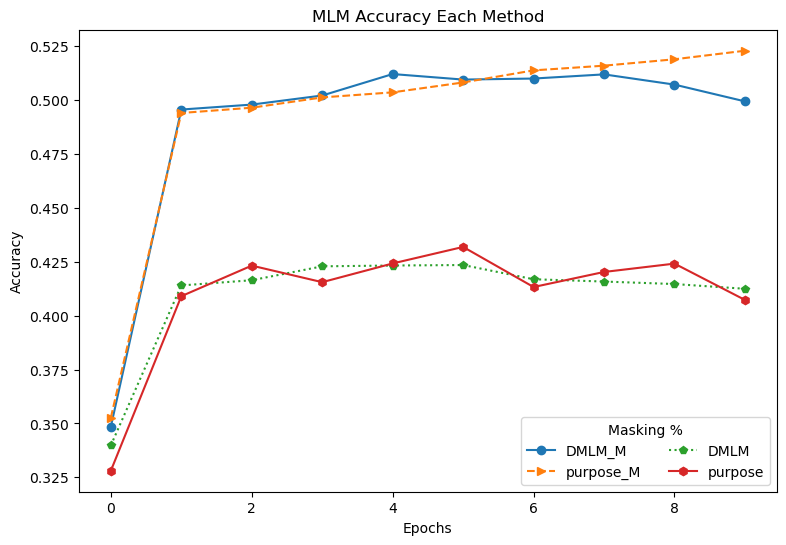

In [ ]:
plt.title("MLM Accuracy Each Method")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
acc_lists = [DMLM_move_acc, pur_move_acc, DMLM_acc, pur_acc]
for i in range(4):
    plt.plot(epochs, acc_lists[i], linestyle=line_style[i], marker=mark[i])

plt.legend(["DMLM_M", "purpose_M", "DMLM", "purpose"], loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

# -----------------------------------

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("record.csv")
df = df[50:]

In [ ]:
mask_range = [i for i in range(15, 5, -1)]

In [ ]:
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print((mlm_acc))

[[0.326620631638197, 0.4054389024787346, 0.4261520628498765, 0.4432320013414869, 0.459924871934995, 0.47256468359656284, 0.4977758105431998, 0.5153684983291924, 0.532324708534955, 0.5577905039896806], [0.33580069867280365, 0.41382647196589895, 0.4325218594787506, 0.4478962534871808, 0.4635342795833079, 0.47271723419267797, 0.4966147295673318, 0.5094922126171758, 0.5253820986270155, 0.5371197486279204], [0.32722595647743363, 0.4111497276038355, 0.42795465980411046, 0.4445132826668182, 0.46318463047982555, 0.4721122255158968, 0.49209518500525584, 0.5064254145750338, 0.5261943115750263, 0.5409949183470457], [0.33480889279107223, 0.420467022353712, 0.44254648263928953, 0.45253323894302255, 0.46812274293389733, 0.48383048249223437, 0.4885323798155075, 0.500527354861075, 0.5283380739605994, 0.5545531169852472], [0.34246950132637977, 0.426633390260017, 0.4457732406273654, 0.45117443027576376, 0.47479609729458633, 0.4976195480269955, 0.510692288450074, 0.5329752853333296, 0.5425360986656624, 0

In [ ]:
a = np.array(mlm_acc)
a = np.sort(a.T)
print(a)

[[0.32662063 0.32722596 0.33480889 0.3358007  0.33808075 0.3382518
  0.33968408 0.34081459 0.34228702 0.3424695 ]
 [0.4054389  0.41114973 0.41382647 0.42046702 0.42394541 0.42433842
  0.42465361 0.42663339 0.42980292 0.43029897]
 [0.42615206 0.42795466 0.43252186 0.44228703 0.44254648 0.44577324
  0.44682305 0.44692194 0.45401332 0.45474547]
 [0.443232   0.44451328 0.44789625 0.45117443 0.45253324 0.46010391
  0.46136018 0.46485066 0.46794355 0.4786464 ]
 [0.45992487 0.46318463 0.46353428 0.46812274 0.47289579 0.4747961
  0.47613573 0.48130546 0.48333539 0.48753027]
 [0.47211223 0.47256468 0.47271723 0.48383048 0.48817193 0.49560244
  0.49761955 0.50130215 0.50649587 0.50717511]
 [0.48853238 0.49209519 0.49661473 0.49777581 0.50202697 0.50709058
  0.51069229 0.51550239 0.51580637 0.53042167]
 [0.50052735 0.50642541 0.50949221 0.5153685  0.5169277  0.52364022
  0.52527804 0.52727825 0.53280764 0.53297529]
 [0.5253821  0.52619431 0.52833807 0.53232471 0.53789426 0.53863872
  0.5425361  0

In [ ]:
total_acc_mean = np.mean(a, axis=1)
total_acc_mean

array([0.33660439, 0.42105548, 0.44197391, 0.45722539, 0.47307653,
       0.48975917, 0.50565584, 0.51907206, 0.5381032 , 0.55585695])

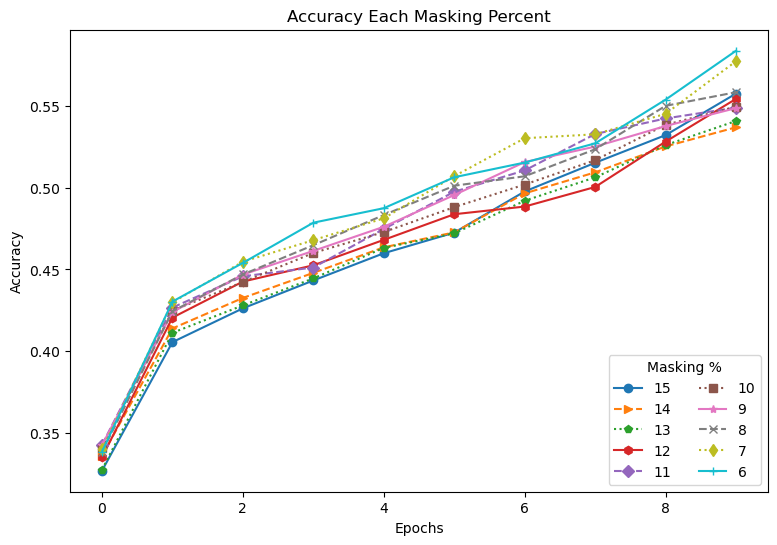

In [ ]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
for i in range(10):
    plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

# -------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("record.csv")
df = df[50:]

In [ ]:
mask_range = [i for i in range(15, 5, -1)]
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())

c:\Users\Ai\anaconda3\envs\transformer_torch\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Ai\anaconda3\envs\transformer_torch\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df_growMask = pd.read_csv("record_mask_grow.csv")
df_growMask

,mlm_acc_each_epoch,mlm_loss_each_epoch,Mask_Percent_each_epoch
0,"[0.3339817447254227, 0.4054689797118495, 0.426...","[0.04848421365022659, 0.03605872765183449, 0.0...","[6, 6, 6, 9, 9, 9, 12, 12, 12, 15]"
1,"[0.3463846384638464, 0.4188890334330688, 0.434...","[0.03865451365709305, 0.016568085178732872, 0....","[6, 7, 7, 7, 10, 10, 10, 13, 13, 13]"
2,"[0.3412243667068758, 0.41812828062988094, 0.42...","[0.04148222506046295, 0.05971059948205948, 0.0...","[6, 7, 7, 7, 10, 10, 10, 13, 13, 13]"
3,"[0.3181749962479364, 0.4089062953292718, 0.420...","[0.03481515496969223, 0.029319196939468384, 0....","[6, 6, 6, 9, 9, 9, 12, 12, 12, 15]"


In [ ]:
epochs = [i for i in range(10)]
dy_mlm_acc = []
for i in range(5):
    dy_mlm_acc.append(df_growMask.iloc[i][0][2:-2].split(','))
    for j in range(len(dy_mlm_acc[-1])):
        dy_mlm_acc[-1][j] = float(dy_mlm_acc[-1][j])
dy_mlm_acc = np.mean(np.array(dy_mlm_acc), axis=0).tolist()
print((dy_mlm_acc))

IndexError: single positional indexer is out-of-bounds

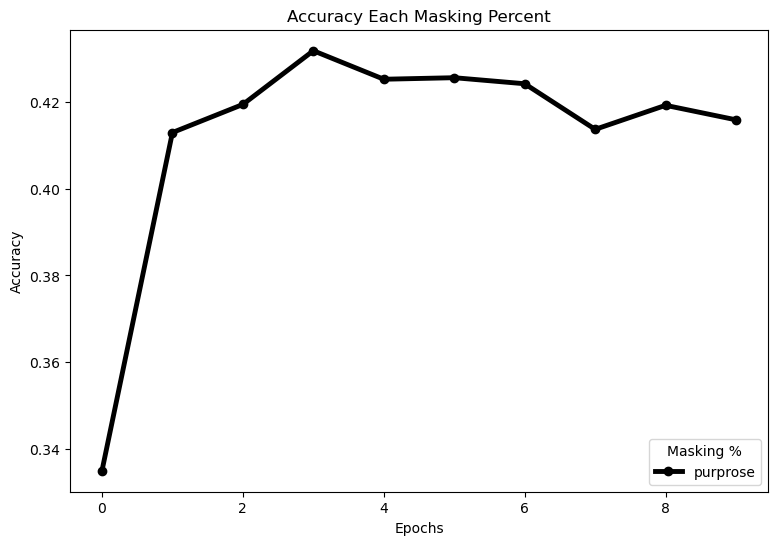

In [ ]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
# for i in range(10):
#     plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])
plt.plot(epochs, dy_mlm_acc, linestyle="solid", marker="o", linewidth=3.5, color='black')

plt.legend(["purprose"], loc ="lower right", title = "Masking %", ncol = 3) 
plt.show()

# Fine-tune Accuracy Compare

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
df_fine_tuned = pd.read_csv("fine_tune_record_n.csv")
df_fine_tuned = df_fine_tuned[:]
df_fine_tuned = df_fine_tuned.sort_values(["model_name"])

In [55]:
models = ["mask_purpose", "mask_purpose_E5", "mask15", "mask6", "mask_DMLM", "mask_DMLM_E5", "mask_purpose_move", "mask_purpose_move_E5", "mask_DMLM_move", "mask_DMLM_move_E5", "mask_adp", "mask_adp_E5"]

In [56]:
train_acc = []
model_name = []
for model in models:
    cur_model = df_fine_tuned[df_fine_tuned["model_name"] == model]
    acc_this_model = []
    for j in range(len(cur_model)):
        acc_this_model.append(cur_model.iloc[j][1][2:-2].split(','))
        for k in range(len(acc_this_model[-1])):
            acc_this_model[-1][k] = float(acc_this_model[-1][k])
    train_acc.append(np.mean(np.array(acc_this_model), axis=0).tolist())

In [57]:
print(train_acc)

[[0.22640449438202243, 0.3530337078651685, 0.5174157303370787, 0.7215730337078651, 0.8844943820224719, 0.9426966292134831, 0.9648314606741574, 0.9793258426966288], [0.24449438202247192, 0.371685393258427, 0.49292134831460677, 0.6447191011235955, 0.7571910112359552, 0.8604494382022472, 0.9191011235955056, 0.9343820224719094], [0.2462921348314607, 0.3569662921348315, 0.46022471910112356, 0.5646067415730338, 0.6731460674157304, 0.7623595505617977, 0.821123595505618, 0.8876404494382015], [0.2702247191011236, 0.37685393258426964, 0.4621348314606742, 0.5203370786516854, 0.6210112359550561, 0.7055056179775281, 0.7587640449438202, 0.8189887640449431], [0.24202247191011236, 0.3357303370786517, 0.46101123595505616, 0.5913483146067416, 0.7615730337078652, 0.9026966292134831, 0.9569662921348316, 0.9766292134831456], [0.24112359550561796, 0.37314606741573036, 0.5379775280898876, 0.7085393258426966, 0.8841573033707866, 0.95561797752809, 0.9758426966292136, 0.9828089887640447], [0.2365168539325843, 0

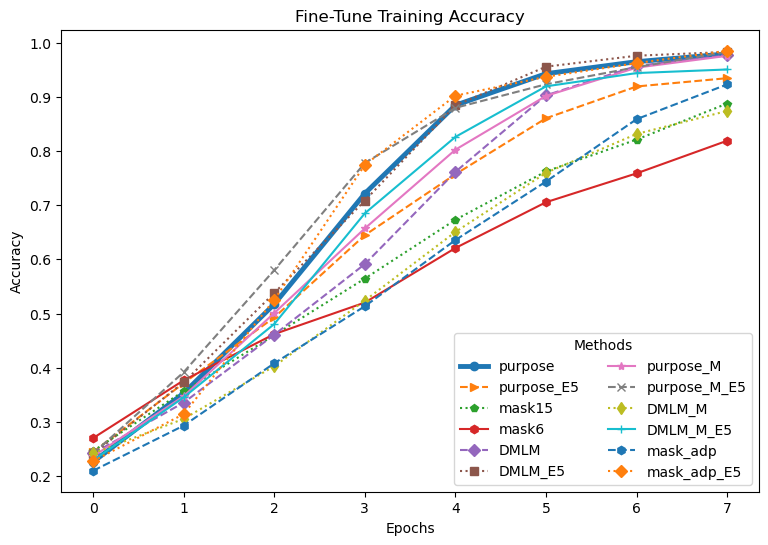

In [58]:
plt.title("Fine-Tune Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
model_name = ["purpose", "purpose_E5", "mask15", "mask6", "DMLM", "DMLM_E5", "purpose_M", "purpose_M_E5", "DMLM_M", "DMLM_M_E5", "mask_adp", "mask_adp_E5"]
epochs = [i for i in range(8)]
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-", "--", ":"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+", "h", "D"]
plt.rcParams["figure.figsize"] = (9, 6)
plt.plot(epochs, train_acc[0], linestyle=line_style[0], marker=mark[0], linewidth=3.5)

for i in range(1, len(model_name)):
    plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(model_name[:], loc ="lower right", title = "Methods", ncol = 2)
plt.show()

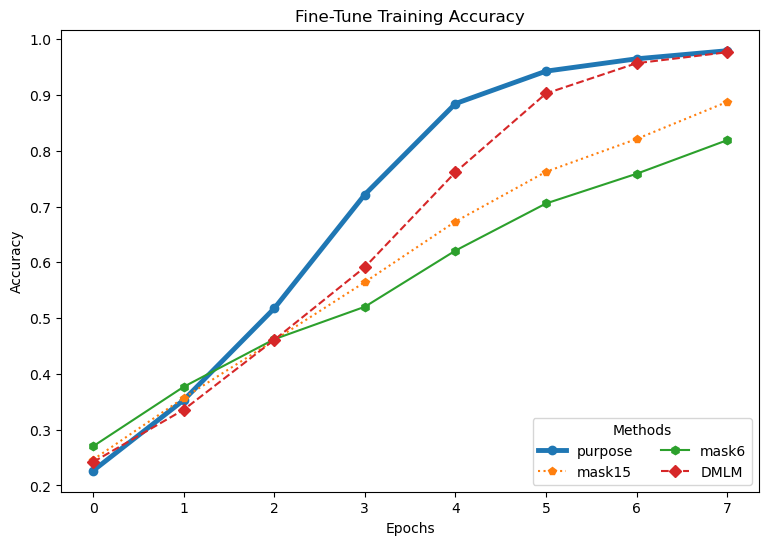

In [59]:
plt.title("Fine-Tune Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

plt.plot(epochs, train_acc[0], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
for i in [2,3,4]:
    plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend([model_name[0]]+model_name[2:5], loc ="lower right", title = "Methods", ncol = 2)
plt.show()

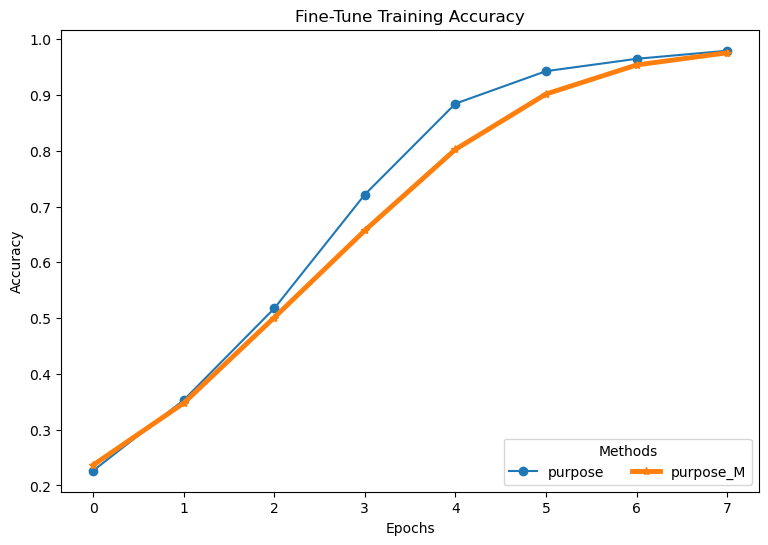

In [60]:
plt.title("Fine-Tune Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

i = 0
plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])
j = 6
plt.plot(epochs, train_acc[j], linestyle=line_style[j], marker=mark[j], linewidth=3.5)

plt.legend([model_name[i]]+[model_name[j]], loc ="lower right", title = "Methods", ncol = 2)
plt.show()

# Fine-tune Accuracy Compare (Epoch)

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_fine_tuned = pd.read_csv("fine_tune_record_epoch.csv")
df_fine_tuned = df_fine_tuned[:]
df_fine_tuned = df_fine_tuned.sort_values(["model_name"])

# df_fine_tuned.to_csv("fine_tune_record_epoch.csv", index=False)

In [108]:
models = ["maskPos_purpose", "maskPos_purpose_E2", "maskPos_purpose_E4", "maskPos_purpose_E6", "maskPos_purpose_E8", \
          "mask_purpose", "mask_purpose_E2", "mask_purpose_E4", "mask_purpose_E6", "mask_purpose_E8", \
          "mask_DMLM_E10", "mask_DMLM_E2", "mask_DMLM_E4", "mask_DMLM_E6", "mask_DMLM_E8", \
          "maskPos_DMLM_E10", "maskPos_DMLM_E2", "maskPos_DMLM_E4", "maskPos_DMLM_E6", "maskPos_DMLM_E8"]
train_acc = []
model_name = []
for model in models:
    cur_model = df_fine_tuned[df_fine_tuned["model_name"] == model]
    acc_this_model = []
    for j in range(len(cur_model)):
        acc_this_model.append(cur_model.iloc[j][1][2:-2].split(','))
        for k in range(len(acc_this_model[-1])):
            acc_this_model[-1][k] = float(acc_this_model[-1][k])
    train_acc.append(np.mean(np.array(acc_this_model), axis=0).tolist())

epochs = [i for i in range(8)]
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-", "--", ":", "--", ":", "-", "--", ":", "-", "--", "--", ":", "-", "--", ":"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+", "h", "D", "s", "*", "x", "d", "+", "D", "s", "*", "x", "d"]

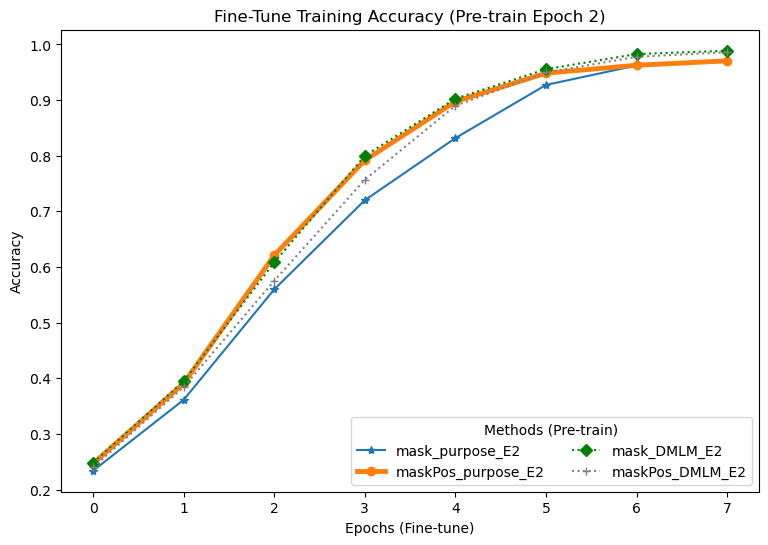

In [109]:
plt.title("Fine-Tune Training Accuracy (Pre-train Epoch 2)")
plt.xlabel("Epochs (Fine-tune)")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

i = 6
plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])
j = 1
plt.plot(epochs, train_acc[j], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
k = 11
plt.plot(epochs, train_acc[k], linestyle=line_style[k], marker=mark[k], c="green")
l = 16
plt.plot(epochs, train_acc[l], linestyle=line_style[l], marker=mark[l], c="gray")

plt.legend([models[i]] + [models[j]] + [models[k]] + [models[l]], loc ="lower right", title = "Methods (Pre-train)", ncol = 2)
plt.show()

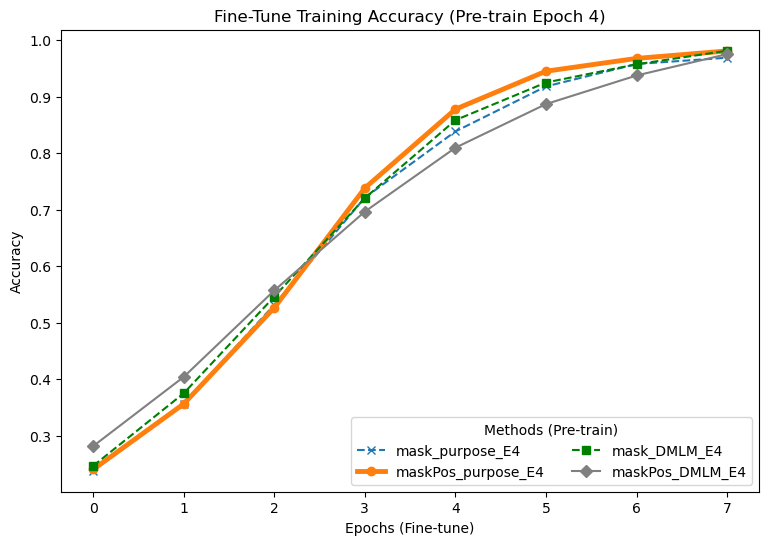

In [110]:
plt.title("Fine-Tune Training Accuracy (Pre-train Epoch 4)")
plt.xlabel("Epochs (Fine-tune)")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

i = 7
plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])
j = 2
plt.plot(epochs, train_acc[j], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
k = 12
plt.plot(epochs, train_acc[k], linestyle=line_style[k], marker=mark[k], c="green")
l = 17
plt.plot(epochs, train_acc[l], linestyle=line_style[l], marker=mark[l], c="gray")

plt.legend([models[i]] + [models[j]] + [models[k]] + [models[l]], loc ="lower right", title = "Methods (Pre-train)", ncol = 2)
plt.show()

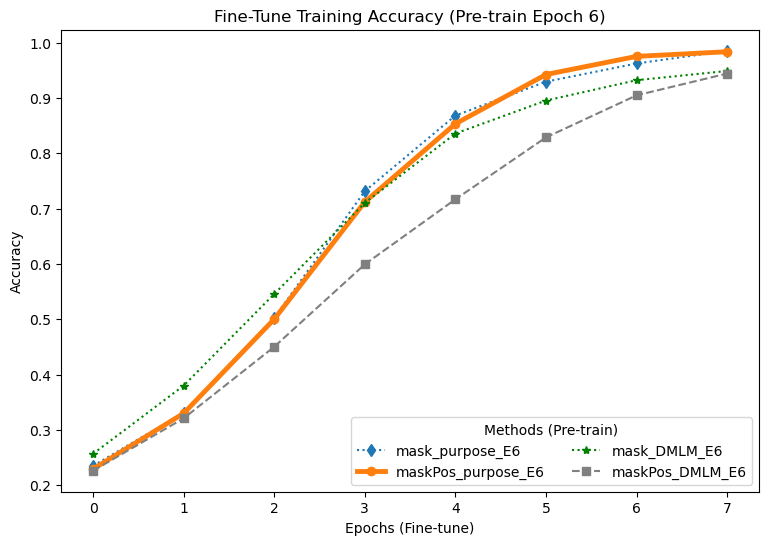

In [111]:
plt.title("Fine-Tune Training Accuracy (Pre-train Epoch 6)")
plt.xlabel("Epochs (Fine-tune)")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

i = 8
plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])
j = 3
plt.plot(epochs, train_acc[j], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
k = 13
plt.plot(epochs, train_acc[k], linestyle=line_style[k], marker=mark[k], c="green")
l = 18
plt.plot(epochs, train_acc[l], linestyle=line_style[l], marker=mark[l], c="gray")

plt.legend([models[i]] + [models[j]] + [models[k]] + [models[l]], loc ="lower right", title = "Methods (Pre-train)", ncol = 2)
plt.show()

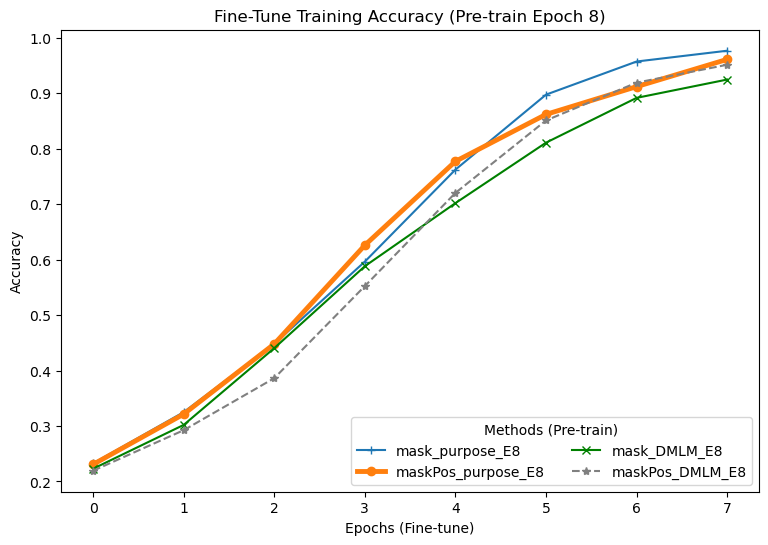

In [112]:
plt.title("Fine-Tune Training Accuracy (Pre-train Epoch 8)")
plt.xlabel("Epochs (Fine-tune)")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

i = 9
plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])
j = 4
plt.plot(epochs, train_acc[j], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
k = 14
plt.plot(epochs, train_acc[k], linestyle=line_style[k], marker=mark[k], c="green")
l = 19
plt.plot(epochs, train_acc[l], linestyle=line_style[l], marker=mark[l], c="gray")

plt.legend([models[i]] + [models[j]] + [models[k]] + [models[l]], loc ="lower right", title = "Methods (Pre-train)", ncol = 2)
plt.show()

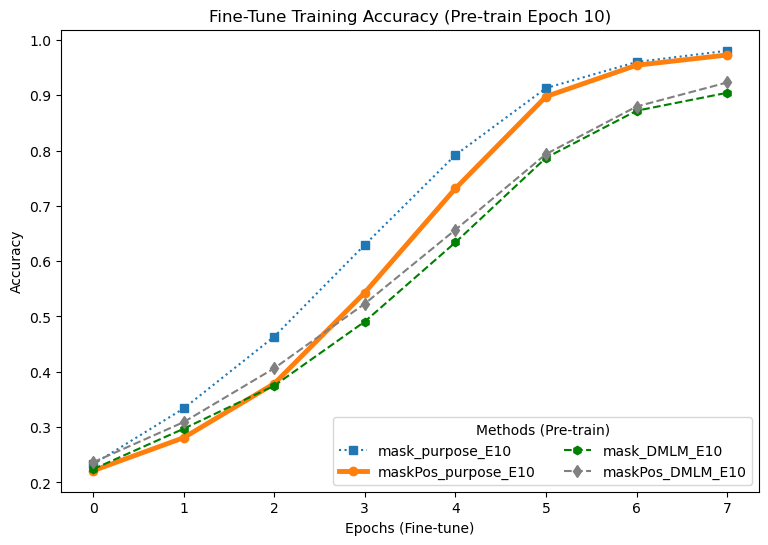

In [113]:
plt.title("Fine-Tune Training Accuracy (Pre-train Epoch 10)")
plt.xlabel("Epochs (Fine-tune)")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)

i = 5
plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])
j = 0
plt.plot(epochs, train_acc[j], linestyle=line_style[0], marker=mark[0], linewidth=3.5)
k = 10
plt.plot(epochs, train_acc[k], linestyle=line_style[k], marker=mark[k], c="green")
l = 15
plt.plot(epochs, train_acc[l], linestyle=line_style[l], marker=mark[l], c="gray")

plt.legend([models[i] + "_E10"] + [models[j] + "_E10"] + [models[k]] + [models[l]], loc ="lower right", title = "Methods (Pre-train)", ncol = 2)
plt.show()

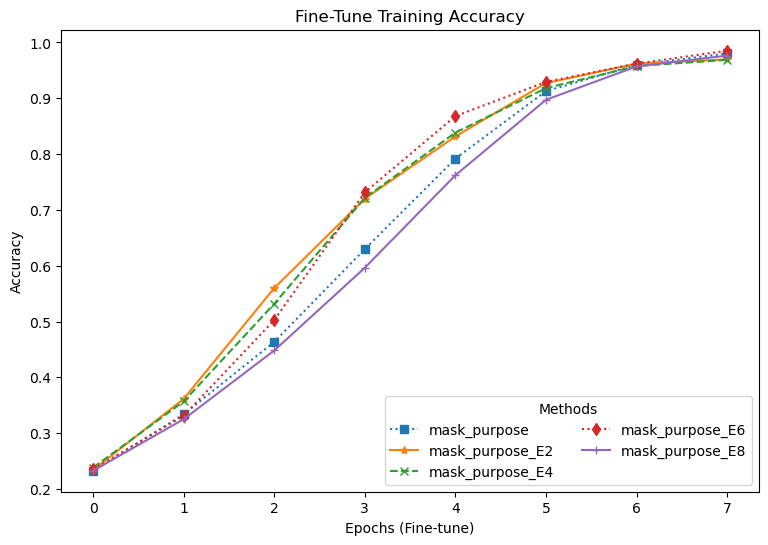

In [114]:
plt.title("Fine-Tune Training Accuracy")
plt.xlabel("Epochs (Fine-tune)")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (9, 6)
epochs = [i for i in range(8)]
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-", "--", ":"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+", "h", "D"]

for i in range(5,10):
    plt.plot(epochs, train_acc[i], linestyle=line_style[i], marker=mark[i])


plt.legend(models[5:10], loc ="lower right", title = "Methods", ncol = 2)
plt.show()